In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [16]:
import os

data_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\ground_weather_data'
save_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\data\\'

dirNames = os.listdir(data_dir)
print(dirNames)


['asos184', 'asos188', 'aws328', 'aws329', 'aws330', 'aws779', 'aws781', 'aws792', 'aws793', 'aws863', 'aws865', 'aws884', 'aws885', 'aws893', '데이터값_설명.txt']


In [17]:
from datetime import datetime, tzinfo
from dateutil import tz
import pytz
import time

# 한 시간 단위의 누적 강수량으로 데이터를 변환한다.
def rain_sum(df):
    prevStr = ''
    timeStr = ''
    sum = 0.0

    time_list = []
    hour_rain = []

    for i in range(0, len(df)):
        timeStr = df.iloc[i,0].split(':')[0]
        # 이전 행과 현재 행의 '년.월.일 시'문자열이 같다면 
        # 같은 '시'에 해당하므로 누적으로 더 해줍니다. 
        if prevStr==timeStr:
            sum+=df.iloc[i,1]

        # 문자열이 다르다면 '시'가 변했으므로 누적된 값을 리스트에 저장하고
        # sum값을 새롭게 누적하기 시작합니다.
        else:
            time_list.append(df.iloc[i,0])
            hour_rain.append(sum)
            sum = df.iloc[i,1] 

        #print(df.iloc[i,0],sum)
        prevStr = timeStr
    return time_list, hour_rain

In [18]:
import re

for dirName in dirNames:
    csv_list = glob(os.path.join(data_dir,dirName,'*.csv'))
    for csvFile in csv_list:
        # 파일명에 rain을 포함하는 파일을 찾습니다.
        count = csvFile.find('rain')
        if count>0:
            fileName = os.path.basename(csvFile)
            print(csvFile)
            
            # 파일 읽기
            df = pd.read_csv(csvFile, encoding='cp949')
            fileFront = fileName.split('_')[0]
            filterStr = re.sub(r'[0-9]', '',fileFront)
            if filterStr=='aws':
                # 지점 컬럼 삭제(불필요)
                df.drop(columns='지점', inplace=True)
                
            # 결측치를 0으로 채워준다.
            df.fillna(0, inplace=True)
            
            # 한 시간단위로 강수량을 수정한다.
            time_list, hour_rain = rain_sum(df)
            
            # pandas DataFrame 생성
            value = {'일시':time_list, '강수량':hour_rain}
            
            # 시간당 강수량을 저장하는 데이터프레임 생성
            df2 = pd.DataFrame(value)
            
            # 데이터형을 시간 타입으로 변경
            df2['일시'] = pd.to_datetime(df2['일시'])
            
            # 데이터 수집 기간을 2020-3-1 0:00 ~ 2021-1-1 0:00
            df2 = df2[df2['일시']>'2020-3-1 8:00']

            df2.set_index(keys='일시', inplace=True, drop=True)
            df2.to_csv(save_dir+fileName, mode='w', encoding='utf-8-sig')

C:\Users\gyqls\Section4\project\solar\ground_weather_data\asos184\asos184_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\asos188\asos188_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws328\aws328_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws329\aws329_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws330\aws330_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws779\aws779_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws781\aws781_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws792\aws792_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws793\aws793_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws863\aws863_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws865\aws865_rain.csv
C:\Users\gyqls\Section4\project\solar\ground_weather_data\aws884\aws884_rain.csv
C:\Users\gyqls\Section4\

In [19]:
def oneHour_avg(df):
    prevStr = ''
    timeStr = ''

    temp_sum = 0.0
    wdir_sum = 0.0
    wspd_sum = 0.0
    humi_sum  = 0.0
    
    time_list = []
    temp_list = []
    wdir_list = []
    wspd_list = []
    humi_list = []

    for i in range(0, len(df)):
        timeStr = df.iloc[i,0].split(':')[0]
        # 이전 행과 현재 행의 '년.월.일 시'문자열이 같다면 
        # 같은 '시'에 해당하므로 누적으로 더 해줍니다. 
        if prevStr==timeStr:
            temp_sum += df.iloc[i,1]
            wdir_sum += df.iloc[i,2]
            wspd_sum += df.iloc[i,3]
            humi_sum += df.iloc[i,4]

        # 문자열이 다르다면 '시'가 변했으므로 누적된 값을 리스트에 저장하고
        # sum값을 새롭게 누적하기 시작합니다.
        else:
            time_list.append(df.iloc[i,0])
            temp_list.append(temp_sum/6)
            wdir_list.append(wdir_sum/6)
            wspd_list.append(wspd_sum/6)
            humi_list.append(humi_sum/6)
            temp_sum = df.iloc[i,1] 
            wdir_sum = df.iloc[i,2]
            wspd_sum = df.iloc[i,3]
            humi_sum = df.iloc[i,4]
            
        prevStr = timeStr
    
    return time_list, temp_list, wdir_list, wspd_list, humi_list   

In [20]:
for dirName in dirNames:
    csv_list = glob(os.path.join(data_dir,dirName,'*.csv'))
    for csvFile in csv_list:
        
        count = csvFile.find('rain')
        
        # 파일명에 rain을 포함하지 않는 파일을 찾습니다.
        if count<0:
            fileName = os.path.basename(csvFile)
            #print(csvFile)
            
            # 파일 읽기
            df = pd.read_csv(csvFile, encoding='cp949')

            # 결측치를 0으로 채워준다.
            df.fillna(0, inplace=True)
            # 한 시간단위로 강수량을 수정한다.
            time_list, temp_list, wdir_list, wspd_list, humi_list = oneHour_avg(df)

            # pandas DataFrame 생성
            value = {'일시':time_list, '기온':temp_list, '풍향':wdir_list, '풍속':wspd_list, '습도':humi_list}            
            # 시간당 강수량을 저장하는 데이터프레임 생성
            df2 = pd.DataFrame(value)            

            df2['일시'] = pd.to_datetime(df2['일시'])
            df2 = df2[df2['일시']>'2020.3.1 8:00']
            #print(df2)
            df2.set_index(keys='일시', inplace=True, drop=True)
            df2.to_csv(save_dir+fileName, mode='w', encoding='utf-8-sig')


In [21]:
# UTC Time -> SEOUL Time
def convTime(dt_str):
    timeFormat = "%Y-%m-%d %H:%M"
    
    # Create datetime object in local timezone
    dt_utc = datetime.strptime(dt_str, timeFormat)
    dt_utc = dt_utc.replace(tzinfo=pytz.UTC)
    
    # Get local timezone
    local_zone = tz.tzlocal()

    # Convert timezone of datetime from UTC to local
    dt_local = dt_utc.astimezone(local_zone)
    conv_time = dt_local.strftime(timeFormat)    
    return conv_time

In [22]:
import os

data_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\sat_data'
save_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\data\\'


dirNames = os.listdir(data_dir)
print(dirNames)

['강정동.csv', '구좌읍.csv', '남원읍.csv', '노형동.csv', '대정읍.csv', '도련이동.csv', '도련일동.csv', '도순동.csv', '도평동.csv', '동홍동.csv', '봉개동.csv', '삼양일동.csv', '상예동.csv', '상효동.csv', '색달동.csv', '서귀동.csv', '서호동.csv', '서홍동.csv', '성산읍.csv', '아라이동.csv', '아라일동.csv', '안덕면.csv', '애월읍.csv', '영평동.csv', '오등동.csv', '오라이동.csv', '오라일동.csv', '외도일동.csv', '용강동.csv', '용담이동.csv', '월평동.csv', '이도일동.csv', '이호이동.csv', '조천읍.csv', '중문동.csv', '토평동.csv', '표선면.csv', '하예동.csv', '하원동.csv', '한경면.csv', '한림읍.csv', '해안동.csv', '호근동.csv', '화북이동.csv', '회천동.csv']


In [23]:
print(len(dirNames))

45


In [27]:
data_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\sat_data'
save_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\data\\'

csv_list = glob(os.path.join(data_dir,'*.csv'))

for csvFile in csv_list:
    
    # 파일 읽기
    df = pd.read_csv(csvFile, encoding='cp949')
    dropCol = ['Unnamed: 1', 'dim_y', 'dim_x', 'ASR', 
               'ASR_DQF1', 'RSR', 'RSR_DQF1', 'SW_DQF',
               'gk2a_imager_projection']
    
    df.drop(columns = dropCol, inplace=True)
    
    # 결측치를 0으로 채워준다.
    df.fillna(0, inplace=True)
    
    # UTC -> Seoul Time으로 변경한다.
    conv_time = list(map(convTime, df['date']))
    df['date']=conv_time
    # 컬럼명을 수정한다. 'date'-> '일시'
    df.rename(columns = {'date':'일시'},inplace=True)
    df['일시'] = pd.to_datetime(df['일시'])
    df.set_index(keys='일시', inplace=True, drop=True)
    # 파일명만을 가져온다.
    fileName = os.path.basename(csvFile)
    df.to_csv(save_dir+fileName, mode='w', encoding='utf-8-sig')

In [28]:
dirNames = os.listdir('./')
dirNames

['1_PreProc_2019_Jeju_solar_capa.csv',
 'flask_app',
 'Jeju_solar_local_crd.csv',
 'model.ipynb',
 'mode_sunl.ipynb',
 'more',
 'solar',
 '__pycache__']

In [30]:
matchFile = "C:\\Users\\gyqls\\Section4\\project\\solar\\jeju_geo_match_info.csv"

# 파일 읽기
match_df = pd.read_csv(matchFile, encoding='UTF-8')
match_df


,위도,경도,동이름,유형,지점번호,가까운 지점,대체위도,대체경도
0,33.221816,126.252994,대정읍,aws,793,대정,33.2410,126.2263
1,33.240160,126.380600,하예동,aws,328,중문,33.2494,126.4060
2,33.246950,126.489270,강정동,aws,884,기상(과),33.2593,126.5176
3,33.246790,126.563960,서귀동,aws,884,기상(과),33.2593,126.5176
4,33.261770,126.386780,상예동,aws,328,중문,33.2494,126.4060
5,33.264093,126.412000,색달동,aws,328,중문,33.2494,126.4060
6,33.262002,126.428862,중문동,aws,328,중문,33.2494,126.4060
7,33.256966,126.473104,도순동,aws,865,오등,33.4627,126.5191
8,33.262659,126.460024,하원동,aws,884,기상(과),33.2593,126.5176
9,33.259596,126.519646,서호동,aws,884,기상(과),33.2593,126.5176


In [31]:
dropCol = ['위도', '경도', '대체위도', '대체경도', '가까운 지점']
match_df.drop(columns = dropCol, inplace=True)

In [32]:
match_df

,동이름,유형,지점번호
0,대정읍,aws,793
1,하예동,aws,328
2,강정동,aws,884
3,서귀동,aws,884
4,상예동,aws,328
5,색달동,aws,328
6,중문동,aws,328
7,도순동,aws,865
8,하원동,aws,884
9,서호동,aws,884


In [33]:
fileList1 = []
fileList2 = []
for i in range(len(match_df)):
    fileList1.append(match_df.iloc[i, 1]+str(match_df.iloc[i, 2])+'.csv')
    fileList2.append(match_df.iloc[i, 1]+str(match_df.iloc[i, 2])+'_rain.csv')
match_df['파일명1'] = fileList1
match_df['파일명2'] = fileList2
match_df

,동이름,유형,지점번호,파일명1,파일명2
0,대정읍,aws,793,aws793.csv,aws793_rain.csv
1,하예동,aws,328,aws328.csv,aws328_rain.csv
2,강정동,aws,884,aws884.csv,aws884_rain.csv
3,서귀동,aws,884,aws884.csv,aws884_rain.csv
4,상예동,aws,328,aws328.csv,aws328_rain.csv
5,색달동,aws,328,aws328.csv,aws328_rain.csv
6,중문동,aws,328,aws328.csv,aws328_rain.csv
7,도순동,aws,865,aws865.csv,aws865_rain.csv
8,하원동,aws,884,aws884.csv,aws884_rain.csv
9,서호동,aws,884,aws884.csv,aws884_rain.csv


In [35]:
data_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\data\\'
save_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\'

for i in range(0, len(match_df)):
    # 하향 단파 복사
    mergeFile  = data_dir + match_df.iloc[i, 0]+'.csv'
    merge_df   = pd.read_csv(mergeFile, encoding='UTF-8')
    
    # 강수량 정보 파일 : '파일명2'
    precipFile = data_dir + match_df.iloc[i, 4]
    precip_df  = pd.read_csv(precipFile, encoding='UTF-8')

    # 기온, 풍향, 풍속, 습도 정보 파일 : '파일명1'
    awsFile = data_dir + match_df.iloc[i, 3]
    aws_df  = pd.read_csv(awsFile, encoding='UTF-8')
    
    # 데이터 프레임간 합치기
    # 위성 일사량 데이터가 중간 중간 누락되었다.
    # 따라서 AWS,ASOS데이터도 함께 삭제 해주어야 한다.
    # 그래서 데이터프레임을 합치는데 기준을 일사량 데이터의 인덱스로 한다.
    merge_df = pd.merge(merge_df, precip_df, how='left', left_on='일시', right_on='일시')
    merge_df = pd.merge(merge_df, aws_df, how='left', left_on='일시', right_on='일시')
   
    #merge_df.set_index(keys='일시', inplace=True, drop=True)
    merge_df.to_csv(save_dir + match_df.iloc[i, 0]+'.csv', mode='w', encoding='utf-8-sig')


In [37]:
solarPowerFile = "C:\\Users\\gyqls\\Section4\\project\\solar\\한국전력거래소_시간별육지제주태양광및풍력발전량_2014년-2020년.csv"

# 파일 읽기
power_df = pd.read_csv(solarPowerFile, encoding='cp949')
power_df

,거래일,거래시간,육지태양광 총발전량,육지풍력 총발전량,제주태양광 총발전량,제주풍력 총발전량
0,2014-01-01,0,0.000000,250.214160,0.000000,37.235992
1,2014-01-01,1,0.000000,230.334882,0.000000,40.034720
2,2014-01-01,2,0.000000,224.563859,0.000000,36.944184
3,2014-01-01,3,0.000000,223.519520,0.000000,30.664892
4,2014-01-01,4,0.000000,216.955896,0.000000,24.566528
...,...,...,...,...,...,...
61363,2020-12-31,19,406.184674,823.291232,0.436184,169.120761
61364,2020-12-31,20,289.995063,772.872278,0.025248,151.415406
61365,2020-12-31,21,164.918523,740.541095,0.000224,152.391992
61366,2020-12-31,22,69.294937,734.738133,0.029552,150.711033


In [38]:
dtList = []

for i in range(len(power_df)):
    dtStr = power_df.iloc[i,0] + ' ' + str(power_df.iloc[i,1])+':00'
    dtList.append(dtStr)

power_df['일시'] = dtList
power_df

,거래일,거래시간,육지태양광 총발전량,육지풍력 총발전량,제주태양광 총발전량,제주풍력 총발전량,일시
0,2014-01-01,0,0.000000,250.214160,0.000000,37.235992,2014-01-01 0:00
1,2014-01-01,1,0.000000,230.334882,0.000000,40.034720,2014-01-01 1:00
2,2014-01-01,2,0.000000,224.563859,0.000000,36.944184,2014-01-01 2:00
3,2014-01-01,3,0.000000,223.519520,0.000000,30.664892,2014-01-01 3:00
4,2014-01-01,4,0.000000,216.955896,0.000000,24.566528,2014-01-01 4:00
...,...,...,...,...,...,...,...
61363,2020-12-31,19,406.184674,823.291232,0.436184,169.120761,2020-12-31 19:00
61364,2020-12-31,20,289.995063,772.872278,0.025248,151.415406,2020-12-31 20:00
61365,2020-12-31,21,164.918523,740.541095,0.000224,152.391992,2020-12-31 21:00
61366,2020-12-31,22,69.294937,734.738133,0.029552,150.711033,2020-12-31 22:00


In [39]:
for i, timeStr in enumerate(power_df['일시']):
    power_df.iloc[i,6] = (timeStr.replace('-','.'))

power_df

,거래일,거래시간,육지태양광 총발전량,육지풍력 총발전량,제주태양광 총발전량,제주풍력 총발전량,일시
0,2014-01-01,0,0.000000,250.214160,0.000000,37.235992,2014.01.01 0:00
1,2014-01-01,1,0.000000,230.334882,0.000000,40.034720,2014.01.01 1:00
2,2014-01-01,2,0.000000,224.563859,0.000000,36.944184,2014.01.01 2:00
3,2014-01-01,3,0.000000,223.519520,0.000000,30.664892,2014.01.01 3:00
4,2014-01-01,4,0.000000,216.955896,0.000000,24.566528,2014.01.01 4:00
...,...,...,...,...,...,...,...
61363,2020-12-31,19,406.184674,823.291232,0.436184,169.120761,2020.12.31 19:00
61364,2020-12-31,20,289.995063,772.872278,0.025248,151.415406,2020.12.31 20:00
61365,2020-12-31,21,164.918523,740.541095,0.000224,152.391992,2020.12.31 21:00
61366,2020-12-31,22,69.294937,734.738133,0.029552,150.711033,2020.12.31 22:00


In [40]:
delCol = ['거래일','거래시간','육지태양광 총발전량', '육지풍력 총발전량','제주풍력 총발전량']
power_df.drop(columns=delCol, inplace=True)
power_df['일시'] = pd.to_datetime(power_df['일시'])
power_df = power_df[power_df['일시']>'2020.03.1 8:00']
power_df.set_index(keys='일시', inplace=True, drop=True)
power_df

,제주태양광 총발전량
일시,
2020-03-01 09:00:00,5.594496
2020-03-01 10:00:00,11.325051
2020-03-01 11:00:00,17.675403
2020-03-01 12:00:00,22.734366
2020-03-01 13:00:00,27.707441
...,...
2020-12-31 19:00:00,0.436184
2020-12-31 20:00:00,0.025248
2020-12-31 21:00:00,0.000224


In [41]:
saveFile='./태양광발전량.csv'
power_df.to_csv(saveFile, mode='w', encoding='utf-8-sig')

In [42]:
first_df  = power_df[power_df.index<'2020-08-26 2:00:00'].shift(-1)
second_df = power_df[power_df.index>'2020-08-26 1:00:00']
power_df = pd.concat([first_df, second_df])
power_df

,제주태양광 총발전량
일시,
2020-03-01 09:00:00,11.325051
2020-03-01 10:00:00,17.675403
2020-03-01 11:00:00,22.734366
2020-03-01 12:00:00,27.707441
2020-03-01 13:00:00,26.947472
...,...
2020-12-31 19:00:00,0.436184
2020-12-31 20:00:00,0.025248
2020-12-31 21:00:00,0.000224


In [43]:
saveFile='./solarGen1.csv'
power_df.to_csv(saveFile, mode='w', encoding='utf-8-sig')

In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\gyqls\AppData\Local\Temp\ipykernel_41620\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [45]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [48]:
import os
import pandas as pd
from glob import glob

data_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\'
save_dir = 'C:\\Users\\gyqls\\Section4\\project\\solar\\eda\\'

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

dirNames = glob(os.path.join(data_dir, '*.csv'))
print(dirNames)

delCol = ['Unnamed: 0']
firstFlag = True
i = 0

localName = []
newCol = []

for dirName in dirNames:
    # 지역별 컬럼 순서 리스트를 생성
    fileName = os.path.basename(dirName)
    localName.append(fileName.split('.')[0])

    if firstFlag:
        # 파일 읽기
        merge_df = pd.read_csv(dirName, encoding='UTF-8')
        print(merge_df.columns)
        merge_df.drop(columns=delCol, inplace=True)
        merge_df.set_index(keys='일시', inplace=True, drop=True)

        firstFlag = False
    else:
        temp_df = pd.read_csv(dirName, encoding='UTF-8')
        temp_df.drop(columns=delCol, inplace=True)
        temp_df.set_index(keys='일시', inplace=True, drop=True)
        merge_df = pd.merge(merge_df, temp_df, how='left', left_index=True, right_index=True)

    if 'DSR' not in delCol:
        newCol.append('DSR_{}'.format(i))
    if 'DSR_DQF1' not in delCol:
        newCol.append('DSR_DQF1_{}'.format(i))
    if '강수량' not in delCol:
        newCol.append('강수량_{}'.format(i))
    if '풍속' not in delCol:
        newCol.append('풍속_{}'.format(i))
    if '풍향' not in delCol:
        newCol.append('풍향_{}'.format(i))
    if '기온' not in delCol:
        newCol.append('기온_{}'.format(i))
    if '습도' not in delCol:
        newCol.append('습도_{}'.format(i))

    merge_df.columns = newCol
    i += 1

print(merge_df.columns)
print(newCol)
merge_df


['C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\강정동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\구좌읍.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\남원읍.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\노형동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\대정읍.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\도련이동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\도련일동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\도순동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\도평동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\동홍동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\봉개동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\삼양일동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\상예동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\상효동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\색달동.csv', 'C:\\Users\\gyqls\\Section4\\project\\solar\\merge\\서귀동.csv', 'C:\

,DSR_0,DSR_DQF1_0,강수량_0,풍속_0,풍향_0,기온_0,습도_0,DSR_1,DSR_DQF1_1,강수량_1,...,풍향_43,기온_43,습도_43,DSR_44,DSR_DQF1_44,강수량_44,풍속_44,풍향_44,기온_44,습도_44
일시,,,,,,,,,,,,,,,,,,,,,
2020-03-01 09:00:00,121.200005,1.0,0.0,11.796667,19.778333,3.920000,83.991667,176.199997,1.0,0.0,...,98.135000,1.843333,85.401667,110.200005,1.0,0.0,11.065000,108.050000,1.938333,0.0
2020-03-01 10:00:00,172.600006,1.0,0.0,11.640000,17.830000,4.093333,84.608333,179.800003,1.0,0.0,...,91.576667,2.095000,85.355000,161.699997,1.0,0.0,11.120000,92.526667,1.911667,0.0
2020-03-01 11:00:00,146.100006,1.0,0.0,12.000000,21.048333,4.073333,81.141667,167.699997,1.0,0.0,...,72.715000,2.838333,89.451667,119.700005,1.0,0.5,11.005000,69.111667,2.330000,0.0
2020-03-01 12:00:00,168.900009,1.0,0.0,12.276667,31.406667,3.780000,80.210000,162.199997,1.0,0.0,...,88.663333,2.353333,91.985000,128.199997,1.0,0.0,10.866667,76.396667,2.296667,0.0
2020-03-01 13:00:00,231.199997,1.0,0.0,12.245000,17.465000,3.651667,86.155000,266.500000,1.0,0.0,...,71.280000,2.891667,89.501667,227.199997,1.0,0.5,11.131667,71.310000,2.675000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,0.000000,0.0,0.0,2.103333,230.228333,2.430000,72.820000,0.000000,0.0,0.0,...,300.460000,6.408333,57.093333,0.000000,0.0,0.0,2.255000,325.961667,7.356667,0.0
2020-12-31 21:00:00,0.000000,0.0,0.0,2.405000,229.296667,2.036667,70.741667,0.000000,0.0,0.0,...,292.361667,6.206667,59.256667,0.000000,0.0,0.0,2.425000,318.391667,6.331667,0.0
2020-12-31 22:00:00,0.000000,0.0,0.0,2.601667,223.058333,2.116667,72.698333,0.000000,0.0,0.0,...,306.245000,6.621667,53.796667,0.000000,0.0,0.0,2.605000,327.181667,7.045000,0.0


In [50]:
solarGenFile = "C:\\Users\\gyqls\\Section4\\project\\solarGen1.csv"
solar_df = pd.read_csv(solarGenFile, encoding='UTF-8')
solar_df.set_index(keys='일시', inplace=True, drop=True)
solar_df

,제주태양광 총발전량
일시,
2020-03-01 09:00:00,11.325051
2020-03-01 10:00:00,17.675403
2020-03-01 11:00:00,22.734366
2020-03-01 12:00:00,27.707441
2020-03-01 13:00:00,26.947472
...,...
2020-12-31 19:00:00,0.436184
2020-12-31 20:00:00,0.025248
2020-12-31 21:00:00,0.000224


In [51]:
merge_df = pd.merge(merge_df, solar_df, how='left', left_index=True, right_index=True)
merge_df = merge_df.fillna(0)
print(localName)
merge_df.head(20)

['강정동', '구좌읍', '남원읍', '노형동', '대정읍', '도련이동', '도련일동', '도순동', '도평동', '동홍동', '봉개동', '삼양일동', '상예동', '상효동', '색달동', '서귀동', '서호동', '서홍동', '성산읍', '아라이동', '아라일동', '안덕면', '애월읍', '영평동', '오등동', '오라이동', '오라일동', '외도일동', '용강동', '용담이동', '월평동', '이도일동', '이호이동', '조천읍', '중문동', '토평동', '표선면', '하예동', '하원동', '한경면', '한림읍', '해안동', '호근동', '화북이동', '회천동']


,DSR_0,DSR_DQF1_0,강수량_0,풍속_0,풍향_0,기온_0,습도_0,DSR_1,DSR_DQF1_1,강수량_1,...,기온_43,습도_43,DSR_44,DSR_DQF1_44,강수량_44,풍속_44,풍향_44,기온_44,습도_44,제주태양광 총발전량
일시,,,,,,,,,,,,,,,,,,,,,
2020-03-01 09:00:00,121.200005,1.0,0.0,11.796667,19.778333,3.920000,83.991667,176.199997,1.0,0.0,...,1.843333,85.401667,110.200005,1.0,0.0,11.065000,108.050000,1.938333,0.0,11.325051
2020-03-01 10:00:00,172.600006,1.0,0.0,11.640000,17.830000,4.093333,84.608333,179.800003,1.0,0.0,...,2.095000,85.355000,161.699997,1.0,0.0,11.120000,92.526667,1.911667,0.0,17.675403
2020-03-01 11:00:00,146.100006,1.0,0.0,12.000000,21.048333,4.073333,81.141667,167.699997,1.0,0.0,...,2.838333,89.451667,119.700005,1.0,0.5,11.005000,69.111667,2.330000,0.0,22.734366
2020-03-01 12:00:00,168.900009,1.0,0.0,12.276667,31.406667,3.780000,80.210000,162.199997,1.0,0.0,...,2.353333,91.985000,128.199997,1.0,0.0,10.866667,76.396667,2.296667,0.0,27.707441
2020-03-01 13:00:00,231.199997,1.0,0.0,12.245000,17.465000,3.651667,86.155000,266.500000,1.0,0.0,...,2.891667,89.501667,227.199997,1.0,0.5,11.131667,71.310000,2.675000,0.0,26.947472
2020-03-01 14:00:00,256.100006,1.0,0.0,12.446667,23.571667,3.856667,84.251667,159.199997,1.0,0.0,...,2.053333,92.048333,164.400009,1.0,0.0,11.240000,94.641667,2.610000,0.0,20.309746
2020-03-01 15:00:00,106.099998,1.0,0.0,12.768333,23.296667,3.181667,79.455000,157.800003,1.0,0.0,...,3.298333,93.056667,155.100006,1.0,0.0,11.045000,69.816667,1.338333,0.0,13.045877
2020-03-01 16:00:00,151.199997,1.0,0.0,12.568333,169.975000,1.703333,81.008333,190.000000,1.0,0.0,...,4.755000,92.966667,135.699997,1.0,1.0,10.941667,45.951667,2.305000,0.0,9.187901
2020-03-01 17:00:00,174.400009,1.0,0.0,12.180000,184.026667,0.718333,88.583333,175.100006,1.0,0.0,...,5.030000,91.156667,165.400009,1.0,0.0,10.715000,46.701667,2.846667,0.0,4.811644


In [52]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7186 entries, 2020-03-01 09:00:00 to 2021-01-01 00:00:00
Columns: 316 entries, DSR_0 to 제주태양광 총발전량
dtypes: float64(316)
memory usage: 17.6+ MB


In [53]:
merge_df.to_csv(save_dir + "dsr_solar.csv", mode='w', encoding='utf-8-sig')

In [58]:
import platform

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

if platform.system()=='Windows':
    plt.rc('font', family='NanumMyeongjo') # For Windows
    print(plt.rcParams['font.family'])
elif platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic') # For MacOS
    print(plt.rcParams['font.family'])
else:
    plt.rc('font', family='NanumGothic')
    print(plt.rcParams['font.family'])

# 폰트 사이즈
plt.rcParams['font.size'] = 12.

# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 12.

# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 12.

#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

['NanumMyeongjo']


In [59]:
colNum = len(merge_df.columns)
colNum

316

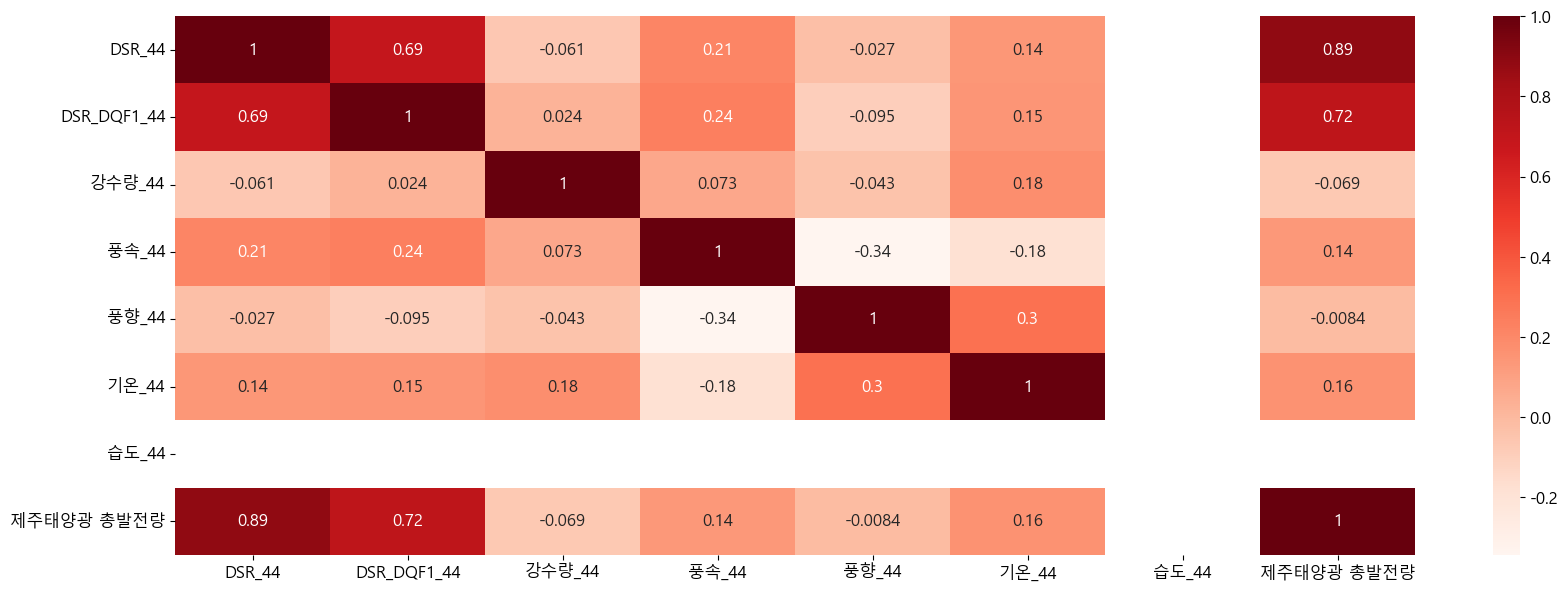

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 운영체제에 따른 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

# 그래프 출력
plt.figure(figsize=(20,7))
cor = merge_df.iloc[:, colNum-8:].corr()
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 그래프 저장
fig = heatmap.get_figure()
fig.savefig("solar_dsr_corr.png")


In [62]:
merge_df.columns

Index(['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1',
       'DSR_DQF1_1', '강수량_1',
       ...
       '기온_43', '습도_43', 'DSR_44', 'DSR_DQF1_44', '강수량_44', '풍속_44', '풍향_44',
       '기온_44', '습도_44', '제주태양광 총발전량'],
      dtype='object', length=316)

In [63]:
merge_df[merge_df['습도_0']>150]=0
merge_df[merge_df['풍속_0']>100]=0
merge_df[merge_df['강수량_0']>30]=0

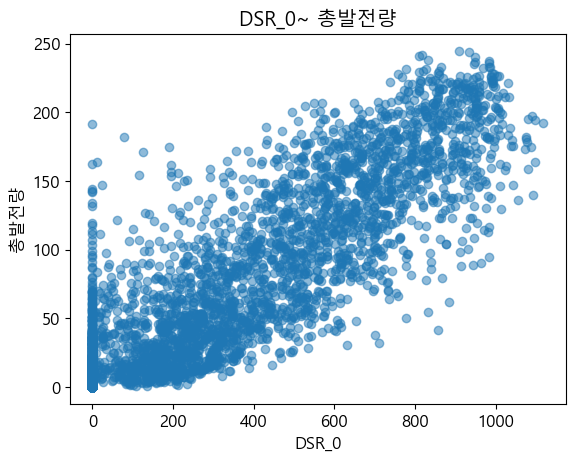

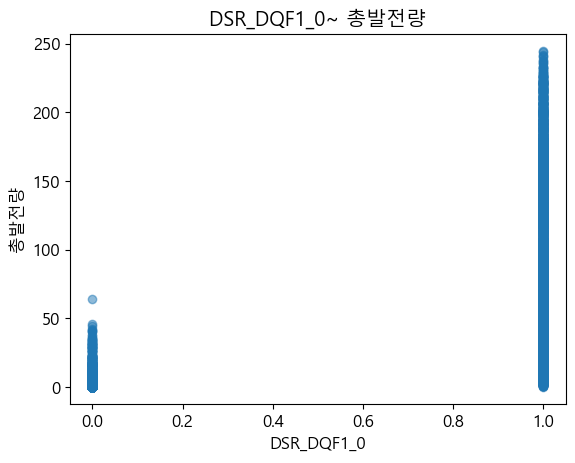

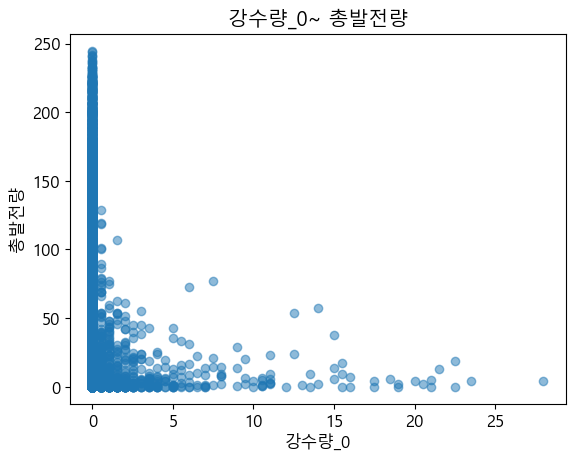

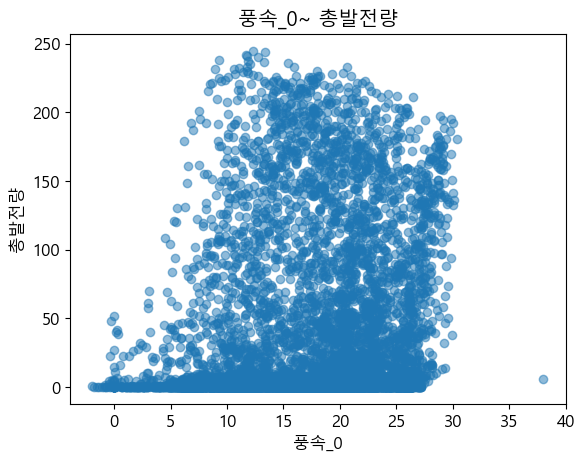

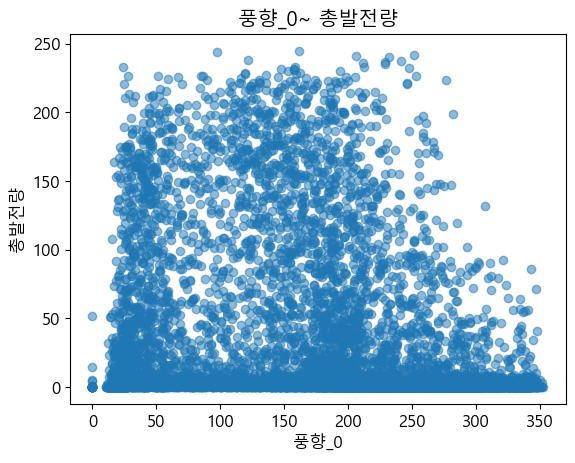

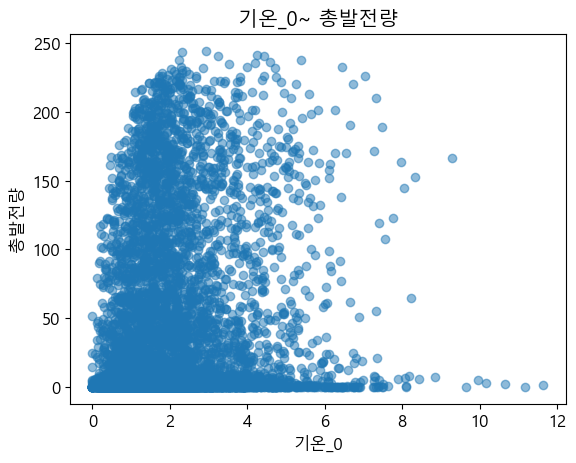

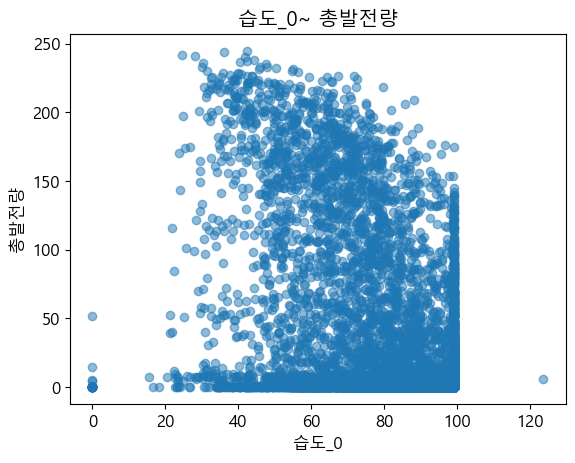

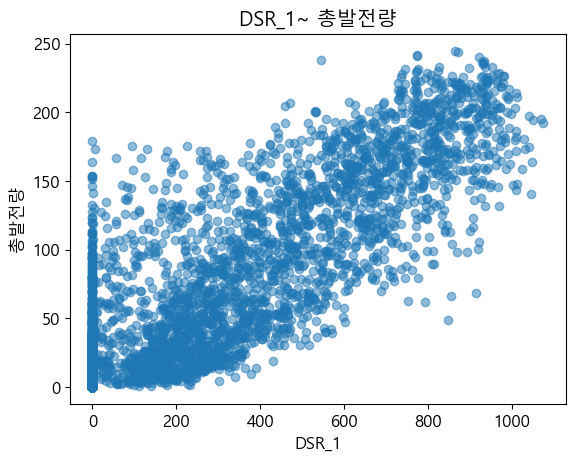

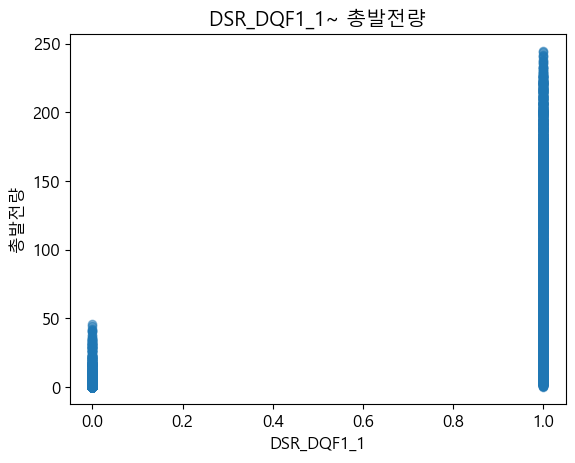

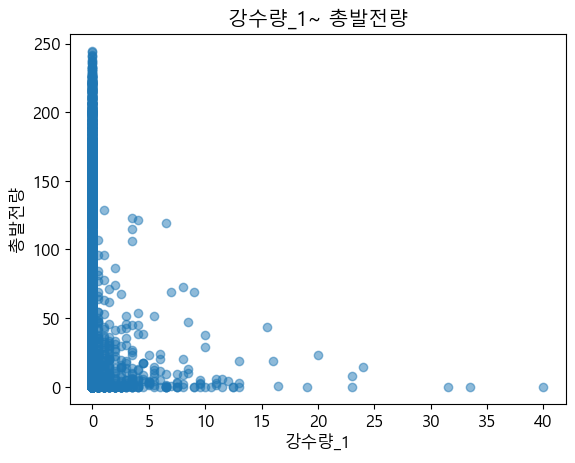

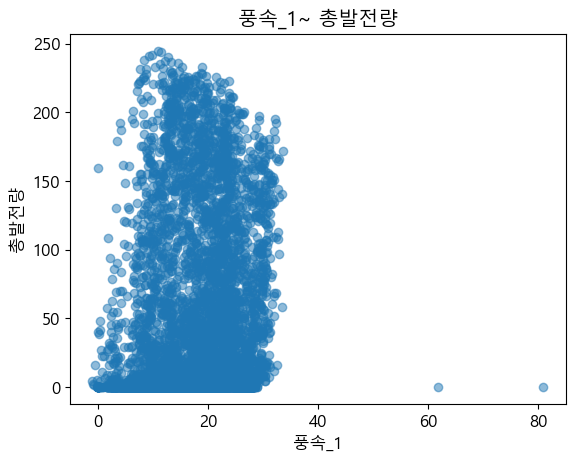

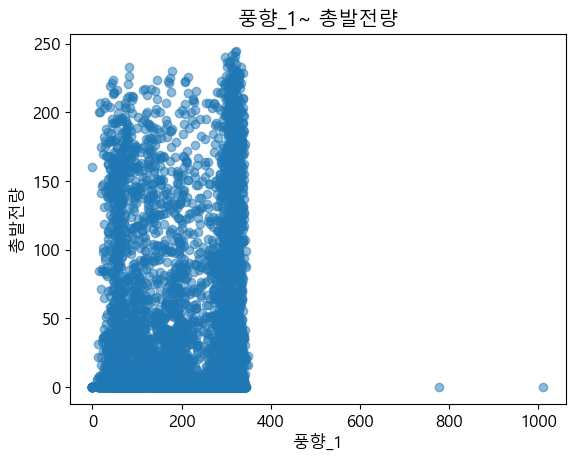

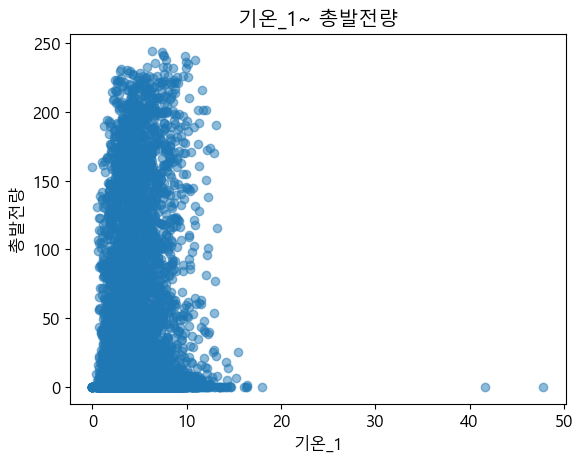

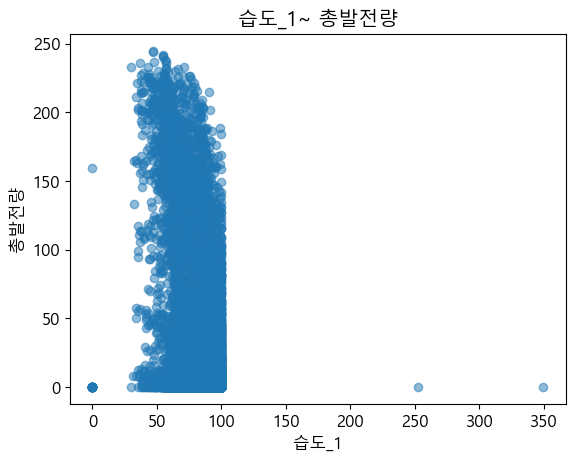

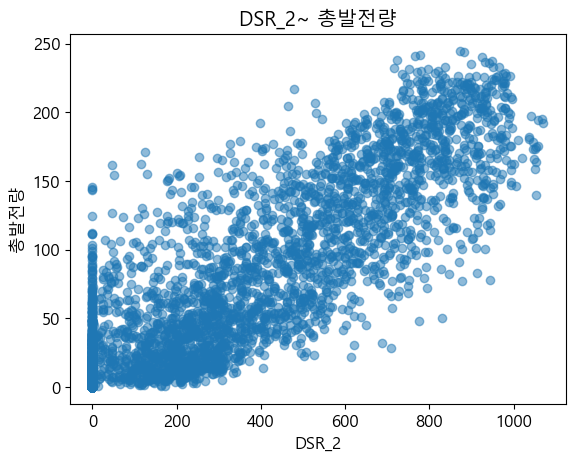

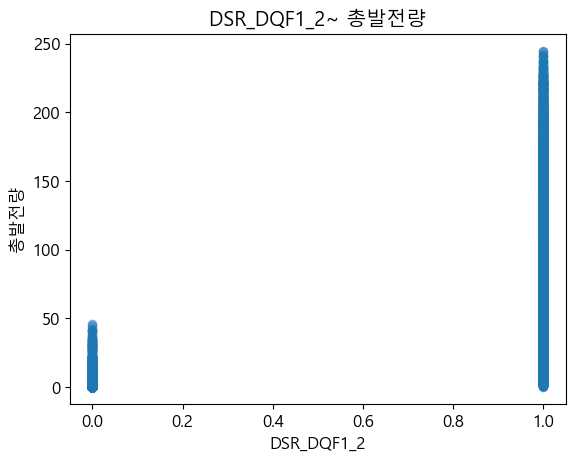

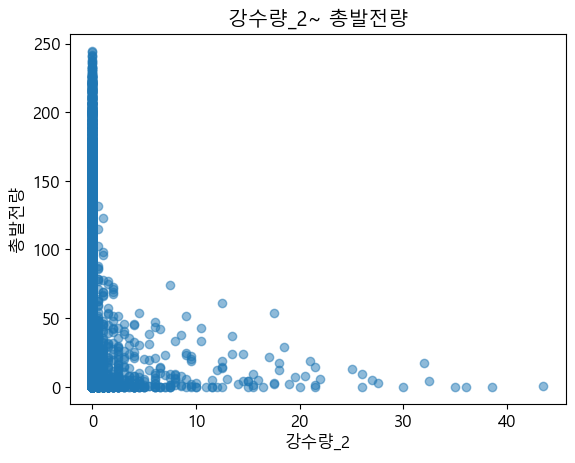

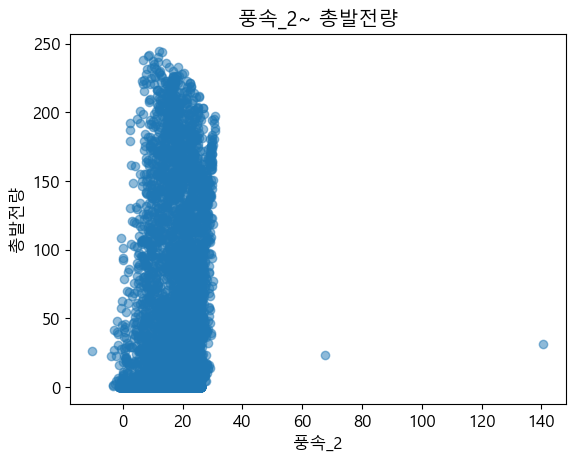

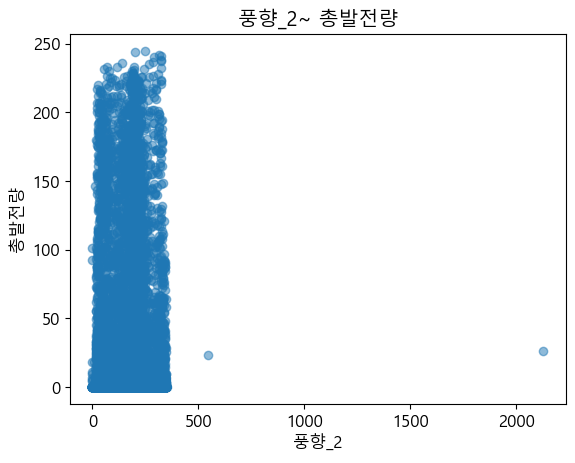

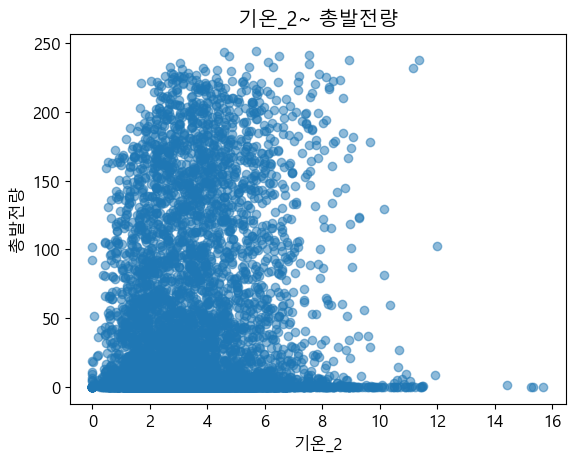

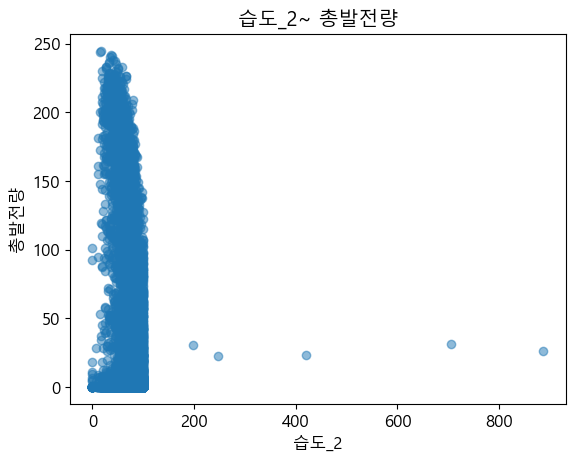

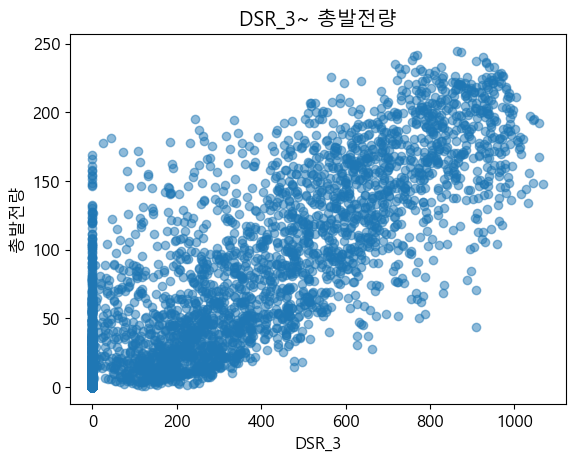

In [64]:
import matplotlib.pyplot as plt

i=0
for colName in merge_df.columns:
    
    X = merge_df[colName]
    Y = merge_df['제주태양광 총발전량']

    plt.scatter(X, Y, alpha=0.5)
    plt.title(colName +'~ 총발전량')
    plt.xlabel(colName)
    plt.ylabel('총발전량')
    plt.show()
    
    if i>20:
        break
    else:
        i+=1

In [65]:
# merge_df데이터프레임에서 총발전량만을 제외한 컬럼으로 'X'라는 이름으로 데이터프레임 생성
X = merge_df.drop(columns = ['제주태양광 총발전량'])
y = merge_df['제주태양광 총발전량']

In [66]:
X.shape, y.shape

((7186, 315), (7186,))

In [67]:
TRAIN_SPLIT = 6500

In [68]:
X.columns

Index(['DSR_0', 'DSR_DQF1_0', '강수량_0', '풍속_0', '풍향_0', '기온_0', '습도_0', 'DSR_1',
       'DSR_DQF1_1', '강수량_1',
       ...
       '풍향_43', '기온_43', '습도_43', 'DSR_44', 'DSR_DQF1_44', '강수량_44', '풍속_44',
       '풍향_44', '기온_44', '습도_44'],
      dtype='object', length=315)

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range = (0,1))
#scaler = StandardScaler()

def normalize(X,y):
    X_norm = X.copy()
    
    for name in X:
        temp = X[name].to_numpy().reshape(-1,1)
        #print(temp)
        X_norm[name] = scaler.fit_transform(temp)
        

    temp = y.to_numpy().reshape(-1,1)
    y_norm = scaler.fit_transform(temp)
        
    return X_norm, y_norm

X_norm, ydata = normalize(X,y)
Xdata = X_norm.to_numpy()

In [72]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [73]:
sequence_length = 24
# 다음 한시간을 예측
future_target = 1
STEP = 1

X_train, y_train = multivariate_data(Xdata, ydata, 0, TRAIN_SPLIT, sequence_length,
                                                   future_target, STEP, single_step=True)
X_test, y_test = multivariate_data(Xdata, ydata, TRAIN_SPLIT, None, sequence_length,
                                               future_target, STEP, single_step=True)
X_train.shape, X_test.shape

((6476, 24, 315), (661, 24, 315))

In [74]:
y_train.shape, y_test.shape

((6476, 1), (661, 1))

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, Input
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models

In [77]:
import tensorflow as tf

BATCH_SIZE = 28
BUFFER_SIZE = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).cache().batch(BATCH_SIZE)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [78]:
MODEL = 'LSTM'

In [79]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional, Dropout

h_units = 100

inputs = Input(shape=(X_train.shape[-2:]))
x = LSTM(h_units, return_sequences=False, recurrent_dropout=0.5, kernel_initializer='he_normal')(inputs)
#x = LSTM(h_units, return_sequences=False, kernel_initializer='he_normal')(x)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

model.compile(loss='mse', metrics=['mae'], optimizer=Adam(learning_rate = 0.0006))

In [80]:
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional

# timesteps,  input_dim
print(X_train.shape[-2:])

h_units = 100

model = models.Sequential()
model.add(SimpleRNN(h_units, return_sequences=True, recurrent_dropout=0.5, kernel_initializer='he_normal', input_shape=X_train.shape[-2:],))
model.add(SimpleRNN(h_units))      
model.add(Dense(1))

model.compile(loss='mse', metrics=['mae'], optimizer=Adam(learning_rate = 0.0006))

(24, 315)


In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 100)           41600     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 61,801
Trainable params: 61,801
Non-trainable params: 0
_________________________________________________________________


In [82]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [84]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint


# 'val_mae'를 기준으로 7epoch동안 val_mae 값이 줄어들지 않을 경우 기존의 learning_rate를 반으로 줄인다.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5,patience=7)

#'val_mae'가 20EPOCH동안 내려가지 않으면 학습을 중단한다.
es=EarlyStopping(monitor='val_mae', patience=20)

# 학습중에 'val_mae'가 가장 낮을 때 'best.h5'에 weight값을 저장한다.
mc = ModelCheckpoint('best.h5', monitor='val_mae', mode='auto', verbose = 1, save_best_only=True)
callback = [reduce_lr, es, mc]
    
history = model.fit(train_data, epochs=150, batch_size=BATCH_SIZE, validation_data=test_data, callbacks=[callback])

Epoch 1/150
230/232 [============================>.] - ETA: 0s - loss: 0.1090 - mae: 0.2421
Epoch 1: val_mae improved from inf to 0.09397, saving model to best.h5
232/232 [==============================] - 7s 20ms/step - loss: 0.1087 - mae: 0.2418 - val_loss: 0.0175 - val_mae: 0.0940 - lr: 6.0000e-04
Epoch 2/150
230/232 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1524
Epoch 2: val_mae did not improve from 0.09397
232/232 [==============================] - 5s 20ms/step - loss: 0.0388 - mae: 0.1524 - val_loss: 0.0163 - val_mae: 0.1026 - lr: 6.0000e-04
Epoch 3/150
230/232 [============================>.] - ETA: 0s - loss: 0.0287 - mae: 0.1280
Epoch 3: val_mae improved from 0.09397 to 0.08466, saving model to best.h5
232/232 [==============================] - 5s 19ms/step - loss: 0.0287 - mae: 0.1280 - val_loss: 0.0129 - val_mae: 0.0847 - lr: 6.0000e-04
Epoch 4/150
231/232 [============================>.] - ETA: 0s - loss: 0.0240 - mae: 0.1151
Epoch 4: val_mae did no

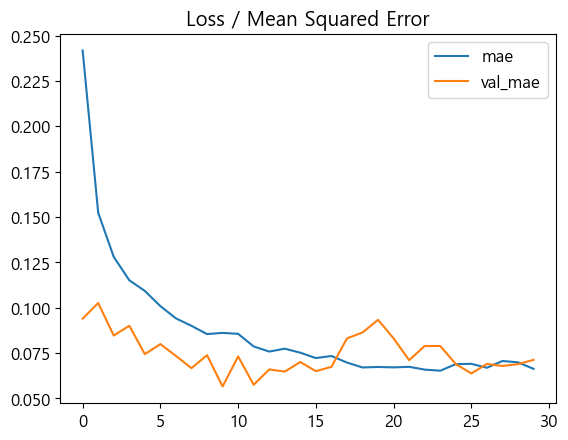

21/21 [==============================] - 0s 8ms/step


In [85]:
import matplotlib.pyplot as pyplot

if MODEL=='LSTM':
    model.load_weights('best.h5')
   
    pyplot.title('Loss / Mean Squared Error')
    pyplot.plot(history.history['mae'], label='mae')
    pyplot.plot(history.history['val_mae'], label='val_mae')
    #pyplot.plot(history.history['val_mae'], label='val_mae')
    pyplot.legend()
    pyplot.show() 
    
    test_loss = model.evaluate(X_test, y_test)
    
    y_pred = model.predict(X_test)

In [86]:
y_pred = model.predict(X_test)

y_pred

21/21 [==============================] - 0s 6ms/step


array([[-3.90463620e-02],
       [ 1.49490107e-02],
       [ 8.53483565e-03],
       [ 1.53945293e-04],
       [-5.54175535e-03],
       [ 3.30583891e-03],
       [-1.76264439e-04],
       [ 4.41984972e-03],
       [-3.73490015e-03],
       [-6.71394030e-03],
       [-4.60500875e-03],
       [ 2.17138994e-02],
       [ 6.17380589e-02],
       [ 1.02573738e-01],
       [ 1.33757815e-01],
       [ 1.46670327e-01],
       [ 1.53966114e-01],
       [ 3.98302019e-01],
       [ 5.31693101e-01],
       [ 5.11942625e-01],
       [ 2.74493158e-01],
       [ 6.70683831e-02],
       [ 2.34691938e-03],
       [-3.70898992e-02],
       [ 9.11300071e-03],
       [ 7.79943308e-03],
       [ 9.42568667e-03],
       [ 9.24973376e-03],
       [ 9.63370688e-03],
       [ 1.91657385e-03],
       [-3.86191998e-04],
       [-6.74684206e-03],
       [-7.63220945e-03],
       [-1.08177820e-03],
       [ 2.67431606e-02],
       [ 7.08647221e-02],
       [ 1.10261843e-01],
       [ 1.34252355e-01],
       [ 1.4

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae_v  = mean_absolute_error(y_test, y_pred)
mse_v = mean_squared_error(y_test, y_pred)
mae_v, mse_v

(0.0565901385563986, 0.008881593176272212)